In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/merged_APPA_data.csv', encoding='windows-1252')

,Year,Month,WeekDay,Valore
0,2018,1,2,21.571242
1,2018,2,2,20.782090
2,2018,3,5,21.225722
3,2018,4,0,12.545969
4,2018,5,3,10.560052
5,2018,6,5,11.418056
6,2018,7,1,13.151678
7,2018,8,4,11.181690
8,2018,9,6,11.224462
9,2018,10,2,13.684211


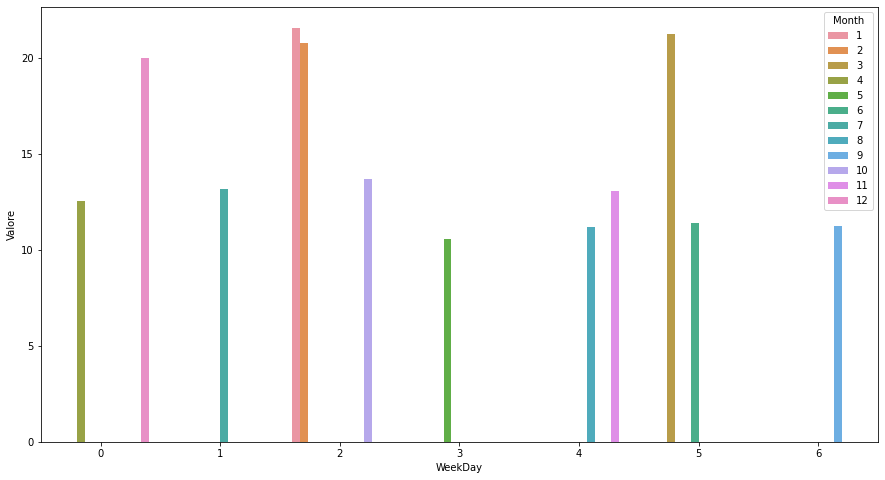

In [7]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
df_week_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "PM2.5") & (df.Data.dt.year == 2018)]
#print(df_week_avg)

df_week_avg = df_week_avg.groupby(pd.PeriodIndex(df_week_avg['Data'], freq="M"))['Valore'].mean()
df_week_avg = df_week_avg.reset_index()
#print(df_week_avg)

df_week_avg = df_week_avg.groupby([df_week_avg.Data.dt.year, df_week_avg.Data.dt.month, df_week_avg.Data.dt.day_of_week]).mean()
df_week_avg.index.names = ["Year", "Month", "WeekDay"]
df_week_avg = df_week_avg.reset_index()
#print(df_week_avg)

plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="WeekDay", hue= "Month",data=df_week_avg)
df_week_avg

In [ ]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_week_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_week_avg = df_week_avg.reset_index()
df_week_avg = df_week_avg.groupby([df_week_avg.Data.dt.month, df_week_avg.Data.dt.day_of_week]).mean()
df_week_avg.index.names = ["Month", "WeekDay"]
df_week_avg = df_week_avg.reset_index()
print(df_week_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="WeekDay", hue= "Month",data=df_week_avg)
xticks(rotation = 90)

    Month  WeekDay     Valore
0       1        2  21.571242
1       2        2  20.782090
2       3        5  21.225722
3       4        0  12.545969
4       5        3  10.560052
5       6        5  11.418056
6       7        1  13.151678
7       8        4  11.181690
8       9        6  11.224462
9      10        2  13.684211
10     11        4  13.064516
11     12        0  19.993280


,Month,WeekDay,Valore
0,1,2,21.571242
1,2,2,20.782090
2,3,5,21.225722
3,4,0,12.545969
4,5,3,10.560052
5,6,5,11.418056
6,7,1,13.151678
7,8,4,11.181690
8,9,6,11.224462
9,10,2,13.684211


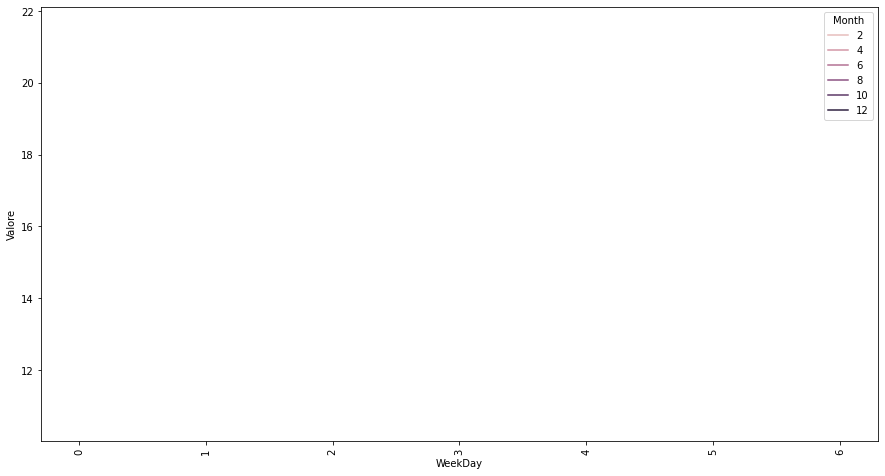

In [28]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
df_week_avg = df[(df.Stazione == "Rovereto") & (df.Inquinante == "PM2.5") & (df.Data.dt.year == 2018)]
df_week_avg = df_week_avg.groupby(pd.PeriodIndex(df_week_avg['Data'], freq="M"))['Valore'].mean()
df_week_avg = df_week_avg.reset_index()
df_week_avg = df_week_avg.groupby([df_week_avg.Data.dt.month, df_week_avg.Data.dt.day_of_week]).mean()
df_week_avg.index.names = ["Month", "WeekDay"]
df_week_avg = df_week_avg.reset_index()
print(df_week_avg)

plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="WeekDay", hue= "Month",data=df_week_avg)
xticks(rotation = 90)
df_week_avg

            Stazione         Inquinante                Data  Valore  \
0         A22 (Avio)  Biossido di Azoto 2017-01-01 01:00:00    54.0   
1         A22 (Avio)  Biossido di Azoto 2017-01-01 02:00:00    58.0   
2         A22 (Avio)  Biossido di Azoto 2017-01-01 03:00:00    54.0   
3         A22 (Avio)  Biossido di Azoto 2017-01-01 04:00:00    54.0   
4         A22 (Avio)  Biossido di Azoto 2017-01-01 05:00:00    50.0   
...              ...                ...                 ...     ...   
2278753  Via Bolzano               PM10 2022-07-07 20:00:00    15.0   
2278754  Via Bolzano               PM10 2022-07-07 21:00:00    13.0   
2278755  Via Bolzano               PM10 2022-07-07 22:00:00    16.0   
2278756  Via Bolzano               PM10 2022-07-07 23:00:00    14.0   
2278757  Via Bolzano               PM10 2022-07-08 00:00:00    14.0   

        UnitÃ  di misura  
0                 Âµg/mc  
1                 Âµg/mc  
2                 Âµg/mc  
3                 Âµg/mc  
4           

,Month,WeekDay,Valore
0,1,0,27.077524
1,1,1,31.888008
2,1,2,26.919170
3,1,3,29.467453
4,1,4,25.989474
...,...,...,...
79,12,2,23.026604
80,12,3,26.669698
81,12,4,25.668589
82,12,5,29.918551


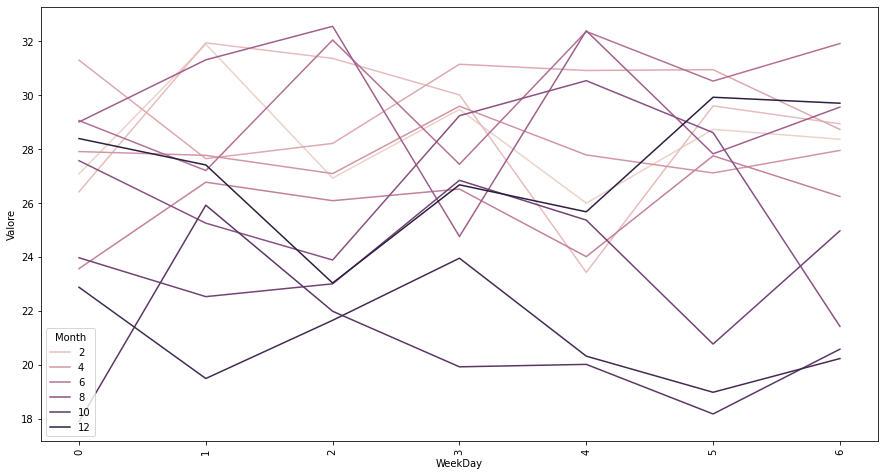

In [29]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
print(df)

df_week_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_week_avg = df_week_avg.reset_index()
print(df_week_avg)

df_week_avg = df_week_avg.groupby([df_week_avg.Data.dt.month, df_week_avg.Data.dt.day_of_week]).mean()
df_week_avg.index.names = ["Month", "WeekDay"]
df_week_avg = df_week_avg.reset_index()
print(df_week_avg)

plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="WeekDay", hue= "Month",data=df_week_avg)
xticks(rotation = 90)
df_week_avg